<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Setting-up-the-environment" data-toc-modified-id="Setting-up-the-environment-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Setting-up the environment</a></span></li><li><span><a href="#Selenium-config" data-toc-modified-id="Selenium-config-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Selenium config</a></span></li><li><span><a href="#Google-Images-config" data-toc-modified-id="Google-Images-config-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Google Images config</a></span></li><li><span><a href="#Scraping-the-image-url" data-toc-modified-id="Scraping-the-image-url-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Scraping the image url</a></span></li><li><span><a href="#Results" data-toc-modified-id="Results-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Results</a></span></li></ul></div>

## Setting-up the environment

In [1]:
# Commo, package for interaction with windows and system
import os
import sys

# Packages and subpackages toget, open an url and get exception when open it
import urllib.request
from urllib.request import Request, urlopen
from urllib.error import HTTPError, URLError

# To scroll dynamically on website
from selenium import webdriver
from selenium.webdriver.common.action_chains import ActionChains

# For time management
import time
from time import sleep

# json read
import json

First, we configure the folder where all the photos will be store.

In [2]:
# Configuration
IMAGES_PATH = "download/"
if not os.path.exists(IMAGES_PATH):
    os.makedirs(IMAGES_PATH)

## Selenium config

We need to set-up the Selenium driver for scraping. The webdrimer `chromedriver` can be found on the Internet and have to be put in the parent directory.

With this setting, the web browser will be hidden during scraping (`headless` option).

In [55]:
class ChromeDriver():

    def __init__(self):
        
        if not "chromedriver.exe" in os.listdir(".."):
            chromedriver_url = "https://chromedriver.storage.googleapis.com/2.41/chromedriver_win32.zip"
            urllib.request.urlretrieve(chromedriver_rul, "..")

        self.path_to_web_driver = "../chromedriver"
        self.options = webdriver.ChromeOptions()
        self.options.add_argument("headless")
        self.driver = webdriver.Chrome(
            executable_path=self.path_to_web_driver,
            chrome_options=self.options)

    def get(self, url):
        self.driver.get(url)


The first function is to prepare the Google Drive website in order to get enough image as requested. As the site works dynamically, we need to scroll down until enough images are displayed. At this time, we extract the meta-data of the image based on their XPath.

The function returns a lsit of XPath which can be read and opened with JSON.

## Google Images config

In [56]:
class GoogleImageScraper():
    
    
    def __init__(self):
        # We initialize the driver for scraping and get the url data
        self.driver = ChromeDriver()
   

    def fit(self, word, number=200):        
        self.word = word
        self.number = number
        
        # Number_of_scrolls * 400 images will be opened in the browser
        number_of_scrolls = int(number / 400 + 1)

        # Create the image downloaded folder : replace space with undescorces
        self.word_ = word.replace(" ", "_")
        self.image_path = os.path.join(IMAGES_PATH, self.word_)

        # The google image generated url with the requested word to search
        url = "https://www.google.co.in/search?q=" + word + "&source=lnms&tbm=isch"
        
        self.driver.get(url)

        # Prepare Google Page
        for _ in range(number_of_scrolls):
            for __ in range(10):
                # Multiple scrolls needed to show all 400 images
                self.driver.driver.execute_script("window.scrollBy(0, 1000000)")
                time.sleep(0.2)
            # to load next 400 images
            time.sleep(2.5)
            try:
                self.driver.driver.find_element_by_xpath(
                    "//*[@id='smb']").click()

                #driver.driver.find_element_by_xpath(
                #   "//input[@value='Show more results']").click()
                time.sleep(2.5)
            except Exception as e:
                print("Less images found:" + str(e))
                break

        img_list = self.driver.driver.find_elements_by_xpath(
             '//div[contains(@class,"rg_meta")]')

        self.img_list = img_list
 

    def get_images(self):
        if not os.path.exists(self.image_path):
            os.makedirs(self.image_path)
            print("{} folder created.".format(self.image_path))
        else:
            print("{} folder already created.".format(self.image_path))
            
        i_downloaded = 0
        for i in range(min(self.number, len(self.img_list))):
            img = self.img_list[i]
            img_name = self.word_ + str(i)
            img_url = json.loads(img.get_attribute('innerHTML'))["ou"]
            img_type = json.loads(img.get_attribute('innerHTML'))["ity"]
            img_path = os.path.join(self.image_path, img_name + "." + img_type)

            try:

                if img_type in ["jpg", "jpeg"]:
                    urllib.request.urlretrieve(img_url, img_path)
                    i_downloaded+=1

            except HTTPError:
                pass

            except URLError:
                pass

            sys.stdout.write("\rDownloading: {}/{}".format(i_downloaded, self.number))
            sys.stdout.flush()

In [57]:
ggscraper = GoogleImageScraper()

In [58]:
ggscraper.fit("Messi", 300)

download/Messi folder created.


In [59]:
ggscraper.get_images()

Downloading: 257/300

## Results

In [47]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

As all our images have been downloaded, we can check some examples from them. Firstly, I generated a dictionary where the keys are the names of the folders in the `download` directory (in my case, football players) and the value are the absolute path to all the pictures inside this directory.

In [48]:
def import_images(path=IMAGES_PATH):
    dict_path = dict()
    
    classes = os.listdir(path)
    for classe in classes:
        if classe != ".ipynb_checkpoints":
            dict_path[classe] = []
            class_dir = os.path.join(path, classe)
            class_dir_ = os.path.abspath(class_dir)
            images = os.listdir(class_dir)
            for image in images:
                img_path = os.path.join(class_dir_, image)
                if img_path.endswith(".jpg"):
                    dict_path[classe].append(img_path)
            
    return dict_path

In [49]:
img_dict = import_images()

Class: Griezmann


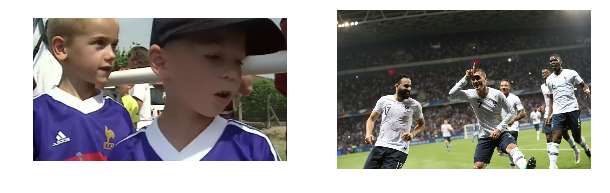

In [50]:
for classe in img_dict.keys():
    print("Class:", classe)
    plt.figure(figsize=(10,5))
    
    img_path_0 = img_dict[classe][0]
    img_path_1 = img_dict[classe][1]
    
    img0 = mpimg.imread(img_path_0)[:, :, :]
    img1 = mpimg.imread(img_path_1)[:, :, :]
    
    plt.subplot(121)
    plt.imshow(img0)
    plt.axis("off")
    plt.subplot(122)
    plt.imshow(img1)
    plt.axis("off")
    plt.show()